In [1]:
import ROOT
from ROOT import gStyle
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.26/08


In [2]:
from ROOT import TH1D,TH2D,TFile,TTree,TCanvas,TPad

In [3]:
fFile = TFile('/Users/bertabeltran/muon_data/data/DShaped/DShapedHoles_NewBC408Scintillator_SiPMV3_6Chn0_5Chn1/FILTERED/SDataF_DShapedHoles_NewBC408Scintillator_SiPMV3_6Chn0_5Chn1.root', "READ") 
fTree = fFile.Get('Data_F')
fTree.Show(10)
fTree.GetEntries()

774419

======> EVENT:10
 Channel         = 1
 Timestamp       = 1123089888000
 Board           = 0
 Energy          = 2857
 EnergyShort     = 591
 Flags           = 16384


In [4]:
fTree.Scan("Channel:Timestamp:Board:Flags", "", "", 200,700000)

200

************************************************************
*    Row   *   Channel * Timestamp *     Board *     Flags *
************************************************************
*   700000 *         0 * 8.177e+16 *         0 *     16384 *
*   700001 *         1 * 8.177e+16 *         0 *     16512 *
*   700002 *         0 * 8.177e+16 *         0 *     16384 *
*   700003 *         0 * 8.177e+16 *         0 *     16384 *
*   700004 *         1 * 8.177e+16 *         0 *     16384 *
*   700005 *         0 * 8.177e+16 *         0 *     16384 *
*   700006 *         1 * 8.177e+16 *         0 *     16384 *
*   700007 *         0 * 8.177e+16 *         0 *     16384 *
*   700008 *         1 * 8.177e+16 *         0 *     16384 *
*   700009 *         0 * 8.177e+16 *         0 *     16384 *
*   700010 *         1 * 8.177e+16 *         0 *     16384 *
*   700011 *         0 * 8.177e+16 *         0 *     16384 *
*   700012 *         1 * 8.177e+16 *         0 *     16384 *
*   700013 *         0 *

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

In [5]:
nEntries = fTree.GetEntries()
print('numer of events',nEntries)
#declare variables that we are going to fill 
TimeDiff=0
EnergyDiff=0
Channel_odd=0
Timestamp_off=0;
Channel_even=0
Timestamp_even=0;
Energy_odd=0;
Energy_even=0;
TDiff_list = []
EDiff_list = []
ECh0_list =[]
ECh1_list =[]
#loop over the three 
for i in range(0, nEntries): 
#for i in range(2, 100): 
    fTree.GetEntry(i) 
    #if entry is even we are the begining of the event, just store time and channel
    if (i % 2) == 0: 
        Channel_even=fTree.Channel
        Timestamp_even=fTree.Timestamp
        Energy_even=fTree.Energy
        if Channel_even==0:
            ECh0_list.append(Energy_even)
        else:
            ECh1_list.append(Energy_even)
    #if entry is odd we are the end of the event, store time and channel and calculate the time and energy difference 
    else:
        Channel_odd=fTree.Channel
        Timestamp_odd=fTree.Timestamp
        Energy_odd=fTree.Energy
        # I want to always do deltaT=chan0-Chan1 
        if Channel_odd==0 :
            TimeDiff=(Timestamp_odd-Timestamp_even)*10**(-3)#Convert picoseconds to nano
            EnergyDiff=Energy_odd-Energy_even
            ECh0_list.append(Energy_odd)
        else:
            TimeDiff=(Timestamp_even-Timestamp_odd)*10**(-3)
            EnergyDiff=Energy_even-Energy_odd
            ECh1_list.append(Energy_odd)           
        EDiff_list.append(EnergyDiff)
        TDiff_list.append(TimeDiff)
        

numer of events 774419


In [6]:
len(TDiff_list)

387209

In [7]:
len(ECh0_list)

389758

In [8]:
len(ECh1_list)

384661

ValueError: x and y must have the same length.

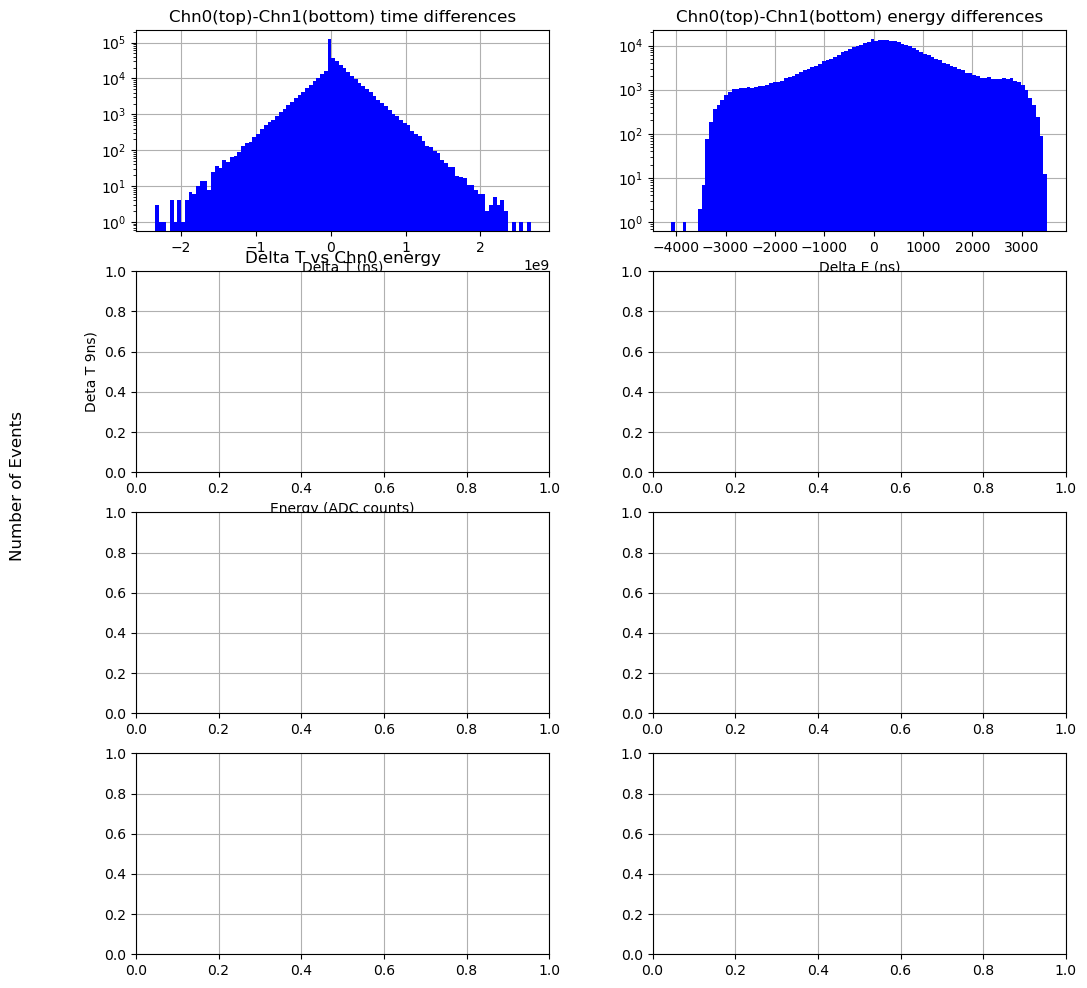

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

#Create plots
fig, ([ax0,ax1],[ax2,ax3],[ax4,ax5], [ax6,ax7]) = plt.subplots(4, 2, figsize=(12,12))
#fig, ([ax0,ax1],[ax2,ax3]) = plt.subplots(2, 2)
fig.supylabel('Number of Events')
plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
x_label = "Time Difference (s)"

#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)
ax4.grid(show_grid)
ax4.set_axisbelow(True)
ax5.grid(show_grid)
ax5.set_axisbelow(True)
ax6.grid(show_grid)
ax6.set_axisbelow(True)
ax7.grid(show_grid)
ax7.set_axisbelow(True)



# Plot data delta t 
plt.sca(ax0)
ax0.set_title("Chn0(top)-Chn1(bottom) time differences")
ax0.set_xlabel("Delta T (ns)")
ax0.hist(TDiff_list, bins = bin_num, histtype='stepfilled' , color ='blue')
plt.yscale('log')

#Plot data delta E
plt.sca(ax1)
ax1.set_title("Chn0(top)-Chn1(bottom) energy differences")
ax1.set_xlabel("Delta E (ns)")
ax1.hist(EDiff_list, bins = bin_num, histtype='stepfilled' , color ='blue')
plt.yscale('log')


# plot delta T vs chan 0 energy 
plt.sca(ax2)
ax2.set_title("Delta T vs Chn0 energy")
ax2.set_xlabel("Energy (ADC counts)")
ax2.set_ylabel("Deta T 9ns)")
ax2.hist2d(ECh0_list, TDiff_list, bins = bin_num, range=np.array([(0, 4000), (-30, 30)]),cmap = 'BuPu',norm = colors.LogNorm())
#plt.yscale('log')
#plt.xscale('log')


# plot delta T vs chan 1 energy 
plt.sca(ax3)
ax3.set_title("Delta T vs Chn1 energy")
ax3.set_xlabel("Energy (ADC counts)")
ax3.set_xlabel("Delta T (ns)")
ax3.hist2d(ECh1_list, TDiff_list, bins = bin_num, range=np.array([(0, 4000), (-30, 30)]),cmap = 'BuPu',norm = colors.LogNorm() )
#plt.yscale('log')
#plt.xscale('log')

#plot energy specteum chn0
plt.sca(ax4)
ax4.set_title("Chn0 energy spectrum")
ax4.set_xlabel("Energy (ADC counts )")
ax4.hist(ECh0_list, bins = bin_num, range=[0, 4000], histtype='stepfilled' , color ='blue')
#plt.yscale('log')

#plot energy spectrum Chn1
plt.sca(ax5)
ax5.set_title("Chn1 energy spectrum")
ax5.set_xlabel("Energy (ADC counts )")
ax5.hist(ECh1_list, bins = bin_num,  range=[0, 4000], histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# plot chan 0 vs chan 1 energy 
plt.sca(ax6)
ax6.set_title("Chn0 energy vs Chn1 energy")
ax6.set_xlabel("Energy (ADC counts)")
ax6.set_ylabel("Energy (ADC counts)")
ax6.hist2d(ECh0_list,ECh1_list, bins = bin_num, range=np.array([(0, 4000), (0,4000)]),cmap = 'BuPu')
#plt.yscale('log')
#plt.xscale('log')

# plot delat E vs delta T  
plt.sca(ax7)
ax7.set_title("Chn0 energy vs Chn1 energy")
ax7.set_xlabel("Energy (ADC counts)")
ax7.set_ylabel("Energy (ADC counts)")
ax7.hist2d(EDiff_list,TDiff_list, bins = bin_num, range=np.array([(-4000, 4000), (-30,30)]),cmap = 'BuPu', norm = colors.LogNorm())
#plt.yscale('log')
#plt.xscale('log')

fig.tight_layout()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# plot:
fig, ax = plt.subplots()

ax.hist(TimeDiff_list, bins=100)


plt.show()